<a href="https://colab.research.google.com/github/Horidefelipe/Curso_py/blob/main/Athlete_Olympiada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import altair as alt
import seaborn as sns   
import numpy as np  #Libreria para insertar vectores
import matplotlib.pyplot as plt #Libreria para insertar graficos

In [ ]:
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/games/olimpicos.csv'
df = pd.read_csv(url, sep = ';')
print(df.head())

In [ ]:
surveys_df = pd.read_csv(url, sep = ';')

In [ ]:
dfmedals = df.query('Medal!="NaN"') #Creo un DataFrame unicamente con quienes ganaron medallas.

DataFrames



In [88]:
surveys_df  #Dataframe Original
dfmedals #Dataframe con participantes que ganaron alguna medalla

columnas = ['NOC','Medal','Sex','Name'] #Dataframe con unicamente las columnas con NOC ,Medal (De quienes ganaron medallas)
dfNOC = dfmedals[[*columnas]] #''

** Analisis de los datos**


In [ ]:
#Ver nombre de las columnas
surveys_df.columns

In [ ]:
surveys_df.shape
#(Rows,Columns)

In [ ]:
#Tipos de datos
surveys_df.dtypes 


In [ ]:
 #analizo variables estadísticas
summary = df.describe(include='all').transpose() 
summary

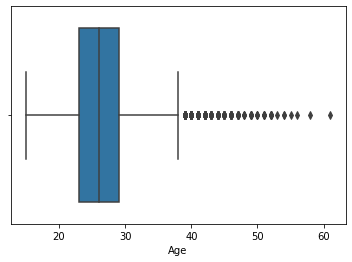

In [127]:
#Valores atipicos en la Edad
# EL valor atipico mas grande, pertenece a un participante de 71 anios
sns.boxplot(x=df['Age'])

In [ ]:
# Agrupados por Sexo
df.Sex.value_counts()

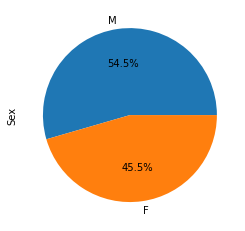

In [126]:
serie = df.Sex.value_counts()
serie.plot.pie(autopct='%1.1f%%')

In [ ]:
# contar cantidad de columnas.

df.count()

# Hay algunos valores de tipo "Height" y "Wheight" faltantes.
#Hay muchos valores de tipo "Medal" que no estan. Sera porque no ganaron medalla y los dejaron vacios en vez de poner Nan?

In [ ]:
#Cantidad de columnas Nulas
print(df.isnull().sum())

Limpieza de Datos

In [12]:
#Borrar Columnas Vacias (Ya las borre)
df = df.dropna()

df01 - Top 10 Personas con mas medallas (gold, Silver , Bronce)

In [ ]:
columnas = ['NOC','Medal','Name'] #Dataframe con unicamente las columnas con NOC ,Medal y Name
df01 = dfmedals[[*columnas]] 

#Persona con mas medallas de Oro.
df01[df.Medal == 'Gold'].groupby(["Name",'NOC']).count().sort_values("Medal",ascending = False).head(10)



In [ ]:
#Persona con mas medallas de Plata.
df01[df.Medal == 'Silver'].groupby(["Name",'NOC']).count().sort_values("Medal",ascending = False).head(10)


In [ ]:
#Persona con mas medallas de Bronce.
df01[df.Medal == 'Bronze'].groupby(["Name",'NOC']).count().sort_values("Medal",ascending = False).head(10)


df02 - Top 10 Paises con mas Participantes

In [140]:
columnas = ['NOC','Year','ID'] #Dataframe con unicamente las columnas con NOC ,Medal y Name
df02 = df[[*columnas]] 
df02.groupby(['NOC','Year']).count().sort_values("ID",ascending = False).head(10)


ID
NOC Year       
USA 2008.0  316
    2016.0  263
    2004.0  262
    2012.0  248
    2000.0  241
RUS 2004.0  189
    2000.0  186
CHN 2008.0  184
AUS 2000.0  183
GER 2016.0  159

df03 - Top 10 Paises con mas medallas (Gold, Silver , Bronce)

In [109]:
columnas = ['NOC','Medal'] #Dataframe con unicamente las columnas con NOC ,Medal 
df03 = dfmedals[[*columnas]] 

In [ ]:
#Pais con mas medallas de Oro.
df03[df.Medal == 'Gold'].groupby(['NOC']).count().sort_values("Medal",ascending = False).head(10)


In [ ]:
#Pais con mas medallas de Plata.
df03[df.Medal == 'Silver'].groupby(['NOC']).count().sort_values("Medal",ascending = False).head(10)


In [ ]:
#Pais con mas medallas de Bronce.
df03[df.Medal == 'Bronze'].groupby(['NOC']).count().sort_values("Medal",ascending = False).head(10)


Top 10 Paises con mas Medallas Femeninas

In [ ]:
#Top 10 pais con mas Medallas Femeninas
df02[dfmedals.Sex =='F'].groupby(['NOC']).count().sort_values('Medal',ascending = False).head(10)

Modalidades con mas participantes

In [119]:
#Top 5 Modalidades con mas participantes
surveys_df.Event.value_counts().head(5)

Football Men's Football        1337
Ice Hockey Men's Ice Hockey    1139
Hockey Men's Hockey             971
Hockey Women's Hockey           895
Football Women's Football       888
Name: Event, dtype: int64

In [102]:
surveys_df['NOC'].describe()

count     85258
unique      210
top         USA
freq       5007
Name: NOC, dtype: object

In [ ]:
surveys_df['NOC'].unique()

In [ ]:

surveys_df['Age'].std()


In [75]:
surveys_df['Age'].mean()


25.834215002052666

In [76]:
surveys_df['Age'].min()

12.0

In [56]:
grouped_data.mean()

NameError: ignored

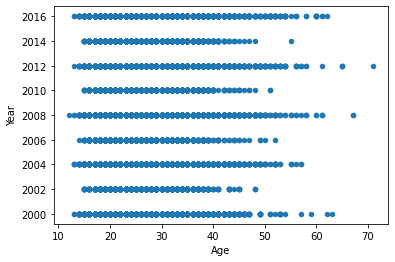

In [81]:
import matplotlib.pyplot as plt
my_plot = surveys_df.plot("Age", "Year", kind="scatter")
plt.show() 

In [96]:
print (surveys_df.groupby(by=['Medal','NOC']).count().groupby(level=[0]).cumsum())

              ID  Name   Sex   Age  Height  Weight  Team  Year  Season  City  \
Medal  NOC                                                                     
Bronze AFG     2     2     2     2       2       2     2     2       2     2   
       ALG     6     6     6     6       6       6     6     6       6     6   
       ARG    64    64    64    64      64      64    64    64      64    64   
       ARM    73    73    73    73      72      73    73    73      73    73   
       AUS   320   320   320   320     319     320   320   320     320   320   
...          ...   ...   ...   ...     ...     ...   ...   ...     ...   ...   
Silver USA  3963  3963  3963  3963    3958    3940  3963  3963    3963  3963   
       UZB  3969  3969  3969  3969    3964    3946  3969  3969    3969  3969   
       VEN  3970  3970  3970  3970    3965    3947  3970  3970    3970  3970   
       VIE  3973  3973  3973  3973    3968    3950  3973  3973    3973  3973   
       ZIM  3977  3977  3977  3977    39

In [87]:
df_pais_medals = surveys_df[['NOC','Medal']]

In [ ]:
print(df_pais_medals["Medal"].value_counts())

Bronze    4152
Gold      4009
Silver    3977
Name: Medal, dtype: int64


In [ ]:
group=df_pais_medals.groupby(["NOC","Medal"])
medallas = group.size().reset_index(name='total_medal')
print(medallas)

     NOC   Medal  total_medal
0    AFG  Bronze            2
1    ALG  Bronze            4
2    ALG    Gold            2
3    ALG  Silver            4
4    ARG  Bronze           58
..   ...     ...          ...
278  VIE    Gold            1
279  VIE  Silver            3
280  ZIM  Bronze            1
281  ZIM    Gold            2
282  ZIM  Silver            4

[283 rows x 3 columns]


In [76]:
medallas.NOC.size()

NameError: ignored

In [77]:
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/main/medallas_noc.csv'
df1 = pd.read_csv(url, sep = ';')
print(df1.head())

   NOC   Gold  Silver  Bronze  Unnamed: 4  Unnamed: 5
0  ROU   61.0    22.0    56.0         NaN         NaN
1  ESP   28.0   135.0    87.0         NaN         NaN
2  ITA   94.0   145.0   177.0         NaN         NaN
3  AZE    7.0    11.0    25.0         NaN         NaN
4  FRA  132.0   166.0   138.0         NaN         NaN


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
df1.dropna(how='all', axis=1, inplace=True) 
print(df1.head())

   NOC   Gold  Silver  Bronze
0  ROU   61.0    22.0    56.0
1  ESP   28.0   135.0    87.0
2  ITA   94.0   145.0   177.0
3  AZE    7.0    11.0    25.0
4  FRA  132.0   166.0   138.0


KeyboardInterrupt: ignored

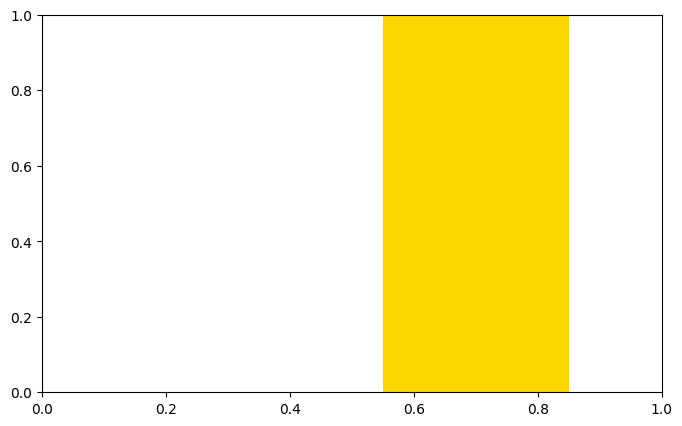

In [78]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)  # 800x500 px

bar_width = 0.30
x = np.arange(df1.index.size)

golden_medals = ax.bar(x - bar_width, df1['Gold'],
                       bar_width, label='Oro', color='#ffd700')
silver_medals = ax.bar(x, df1['Silver'],
                       bar_width, label='Plata', color='#aaa9ad')
bronze_medals = ax.bar(x + bar_width, df1['Silver'],
                       bar_width, label='Bronce', color='#cd7f32')

ax.set_xticks(x)
ax.set_xticklabels(df1.index, rotation=90)
ax.legend()

# Etiquetas en barras
ax.bar_label(golden_medals, padding=3)
ax.bar_label(silver_medals, padding=3)
ax.bar_label(bronze_medals, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura
fig